In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create coffee_df, don't forget to pip install/conda openpyxl 

coffee_df = pd.read_excel('Coffee Shop Sales.xlsx', index_col=0) #index col to 0 to use 'transaction_id' as the index
coffee_df.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
transaction_id,,,,,,,,,,
1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
# info about coffee_df

print(coffee_df.info())

# 'product_id' is int64, I want to make it an object since it's qualitative

<class 'pandas.core.frame.DataFrame'>
Index: 149116 entries, 1 to 149456
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_time  149116 non-null  object        
 2   transaction_qty   149116 non-null  int64         
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   unit_price        149116 non-null  float64       
 7   product_category  149116 non-null  object        
 8   product_type      149116 non-null  object        
 9   product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 12.5+ MB
None


In [4]:
# Turn 'product_id' into an object
coffee_df['product_id'] = coffee_df['product_id'].astype(object)

In [5]:
coffee_df.dtypes

transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                  object
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [6]:
# Earliest and latest times of transaction, looks like open and close times are 6 am and 9 pm

print(f"latest time is {coffee_df['transaction_time'].max()}")
print(f"earliest time is {coffee_df['transaction_time'].min()}")

latest time is 20:59:32
earliest time is 06:00:00


In [7]:
# transaction counts of every location

coffee_df['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

(47000.0, 51000.0)

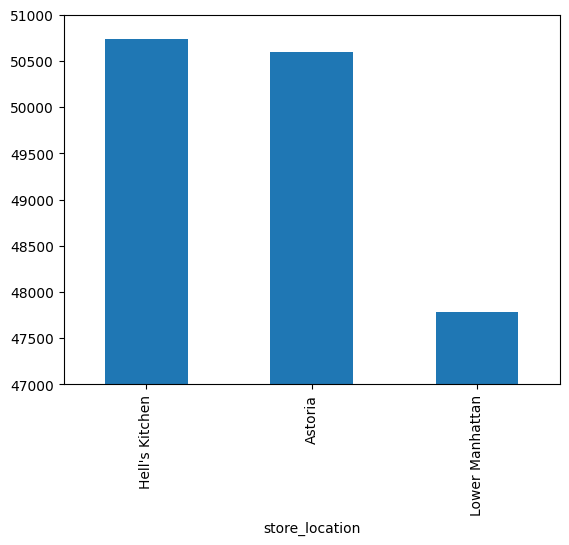

In [8]:
# Plot out previous cell

coffee_df['store_location'].value_counts().plot(kind = 'bar')
plt.ylim(47000,51000)

In [9]:
# Find out all categories for every qualitative column
print("product_category:")
print(f"{coffee_df['product_category'].unique()}")
print("product_type:")
print(f"{coffee_df['product_type'].unique()}")
print("product_detail:")
print(f"{coffee_df['product_detail'].unique()}")

product_category:
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']
product_type:
['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar free syrup' 'Drinking Chocolate' 'Premium Beans'
 'Chai tea' 'Green beans' 'Espresso Beans' 'Green tea' 'Organic Chocolate'
 'Housewares' 'Black tea' 'House blend Beans' 'Clothing']
product_detail:
['Ethiopia Rg' 'Spicy Eye Opener Chai Lg' 'Dark chocolate Lg'
 'Our Old Time Diner Blend Sm' 'Oatmeal Scone' 'Columbian Medium Roast Sm'
 'Latte Rg' 'Dark chocolate Rg' 'Spicy Eye Opener Chai Rg' 'Ethiopia Lg'
 'Earl Grey Lg' 'Ouro Brasileiro shot' 'Serenity Green Tea Lg'
 'Jumbo Savory Scone' 'Lemon Grass Rg' 'Sustainably Grown Organic Lg'
 'Hazelnut B

C:\Users\emagp\AppData\Local\Temp\ipykernel_20692\1069501791.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation = 45)


[Text(0, 0, '58416'),
 Text(0, 0, '45449'),
 Text(0, 0, '22796'),
 Text(0, 0, '11468'),
 Text(0, 0, '6790'),
 Text(0, 0, '1753'),
 Text(0, 0, '1210'),
 Text(0, 0, '747'),
 Text(0, 0, '487')]

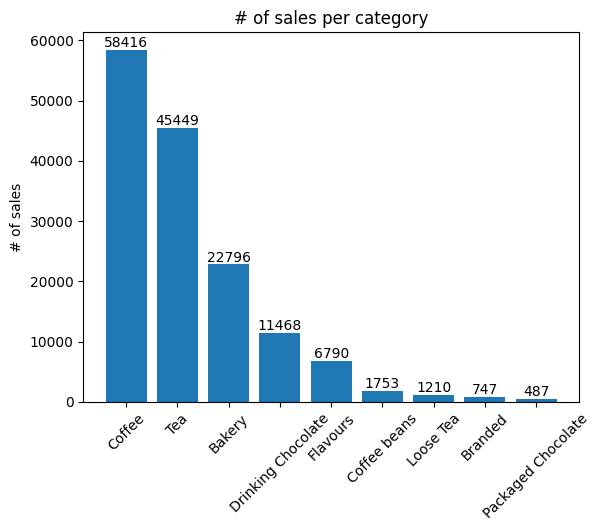

In [10]:
# Plot out # of sales per category

fig, ax = plt.subplots()
value_counts = coffee_df['product_category'].value_counts()
bar_container = ax.bar(value_counts.index, value_counts.values)
ax.set(ylabel = '# of sales', title = '# of sales per category')
ax.set_xticklabels(value_counts.index, rotation = 45)
ax.bar_label(bar_container)

C:\Users\emagp\AppData\Local\Temp\ipykernel_20692\1340816997.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation = 45)


[Text(0, 0, '80964.1'),
 Text(0, 0, '13237'),
 Text(0, 0, '176629'),
 Text(0, 0, '36845.2'),
 Text(0, 0, '47578.8'),
 Text(0, 0, '5432'),
 Text(0, 0, '11213.6'),
 Text(0, 0, '4407.64'),
 Text(0, 0, '128035')]

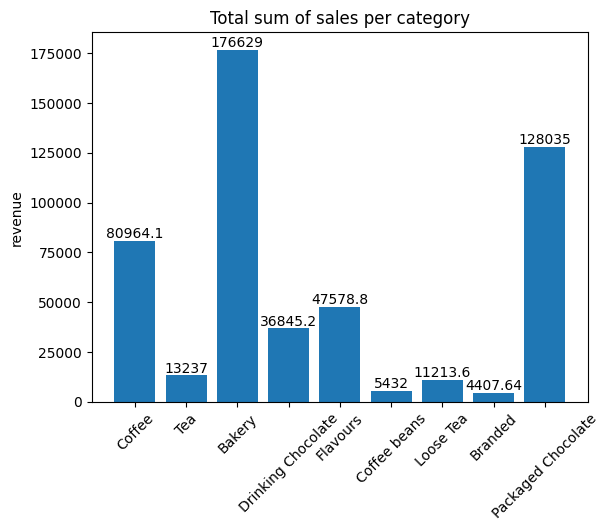

In [11]:
fig, ax = plt.subplots()
category_sums = coffee_df.groupby('product_category')['unit_price'].sum()
bar_container = ax.bar(category_sums.index, category_sums.values)
ax.set(ylabel = 'revenue', title = 'Total sum of sales per category')
ax.set_xticklabels(value_counts.index, rotation = 45)
ax.bar_label(bar_container)

In [12]:
# Total sum of sales per category

print(f"Total sum of sales per category \n{coffee_df.groupby('product_category')['unit_price'].sum()}\n")

# number of sales per category

print(f"# of sales per category \n{coffee_df['product_category'].value_counts()}")


Total sum of sales per category 
product_category
Bakery                 80964.14
Branded                13237.00
Coffee                176629.30
Coffee beans           36845.25
Drinking Chocolate     47578.75
Flavours                5432.00
Loose Tea              11213.60
Packaged Chocolate      4407.64
Tea                   128035.35
Name: unit_price, dtype: float64

# of sales per category 
product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64


In [13]:
# Average price of sale per category

print(f"Average price of sale per category\n{coffee_df.groupby('product_category')['unit_price'].mean().round(2)}")

Average price of sale per category
product_category
Bakery                 3.55
Branded               17.72
Coffee                 3.02
Coffee beans          21.02
Drinking Chocolate     4.15
Flavours               0.80
Loose Tea              9.27
Packaged Chocolate     9.05
Tea                    2.82
Name: unit_price, dtype: float64


In [14]:
# Most popular product per category

coffee_df.groupby('product_category')['product_detail'].max()

product_category
Bakery                       Scottish Cream Scone 
Branded                    I Need My Bean! T-shirt
Coffee                        Ouro Brasileiro shot
Coffee beans                  Primo Espresso Roast
Drinking Chocolate    Sustainably Grown Organic Rg
Flavours                  Sugar Free Vanilla syrup
Loose Tea                   Traditional Blend Chai
Packaged Chocolate       Sustainably Grown Organic
Tea                      Traditional Blend Chai Rg
Name: product_detail, dtype: object